<a href="https://colab.research.google.com/github/cactusvibeyjy/colab/blob/main/flower_photos_hw.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [5]:
gen = ImageDataGenerator(rotation_range = 15,
                         width_shift_range = 0.3,
                         shear_range=0.1,
                         rescale=1./255)


In [6]:
data_path = '/content/gdrive/My Drive/flower_photos'
batch_siz = 3670

In [7]:
data_gen = gen.flow_from_directory(directory=data_path,
                                   batch_size=batch_siz,
                                   shuffle=True,
                                   target_size=(100, 100),
                                   class_mode='categorical')

Found 2313 images belonging to 5 classes.


In [8]:
img, label = data_gen.next()
print(len(img))


2313


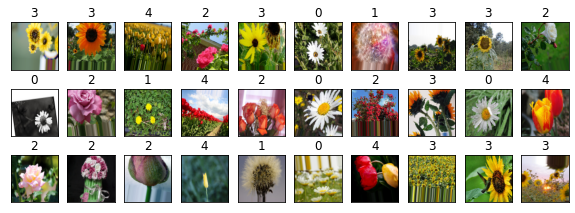

In [9]:
plt.figure(figsize=(10,12))
for i in range(30):
    plt.subplot(10,10, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.title(str(np.argmax(label[i])))
    plt.imshow(img[i])

In [10]:
import numpy as np

result = []
for i in range(2313):
  result.append(np.argmax(label[i]))
result = np.array(result).reshape(-1, 1)
result.shape

(2313, 1)

In [17]:
#train_data, test_data split
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(img, result,test_size=0.3,
shuffle=False, random_state=1004)

print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)


x_train shape: (1619, 100, 100, 3)
x_test shape: (694, 100, 100, 3)
y_train shape: (1619, 1)
y_test shape: (694, 1)


In [19]:
#(One Hot encoding)
y_train=tf.keras.utils.to_categorical(y_train, num_classes=5)
y_test=tf.keras.utils.to_categorical(y_test, num_classes=5)


In [20]:
print(y_train.shape)
print(y_test.shape)

(1619, 5)
(694, 5)


In [25]:
cnn=Sequential()
cnn.add(Conv2D(32,(3,3),input_shape=(100,100,3), padding='same', activation='relu'))
cnn.add(Conv2D(32,(3,3),input_shape=(100,100,3), padding='same'))
cnn.add(MaxPool2D(pool_size=(2,2)))
cnn.add(Dropout(0.25))

cnn.add(Conv2D(64,(3,3), padding='same', activation='relu'))
cnn.add(Conv2D(64,(3,3), padding='same', activation='relu'))
cnn.add(MaxPool2D(pool_size=(2,2)))
cnn.add(Dropout(0.25))

cnn.add(Conv2D(128,(3,3), padding='same', activation='relu'))
cnn.add(MaxPool2D(pool_size=(2,2)))
cnn.add(Dropout(0.25))

cnn.add(Conv2D(256,(3,3), padding='same', activation='relu'))
cnn.add(MaxPool2D(pool_size=(2,2)))
cnn.add(Dropout(0.25))

cnn.add(Flatten())

cnn.add(Dense(128, activation='relu'))
cnn.add(Dropout(0.5))
cnn.add(Dense(5, activation='softmax'))

cnn.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 100, 100, 32)      896       
                                                                 
 conv2d_19 (Conv2D)          (None, 100, 100, 32)      9248      
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 50, 50, 32)       0         
 g2D)                                                            
                                                                 
 dropout_15 (Dropout)        (None, 50, 50, 32)        0         
                                                                 
 conv2d_20 (Conv2D)          (None, 50, 50, 64)        18496     
                                                                 
 conv2d_21 (Conv2D)          (None, 50, 50, 64)        36928     
                                                      

In [26]:
from datetime import datetime
start_time = datetime.now()
cnn.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

early_stopping=EarlyStopping(monitor='val_loss', patience=5)
model_checkpoint=ModelCheckpoint(filepath="/content/gdrive/My Drive/data/bast.h5", monitor='val_loss', save_base_only=True, verbose=1)

hist=cnn.fit(x_train, y_train, batch_size=256, epochs=250, validation_data=(x_test, y_test), callbacks=[early_stopping, model_checkpoint])

end_time=datetime.now()

Epoch 1/250
7/7 [==============================] - ETA: 0s - loss: 1.6666 - accuracy: 0.2569
Epoch 1: saving model to /content/gdrive/My Drive/data/bast.h5
7/7 [==============================] - 16s 632ms/step - loss: 1.6666 - accuracy: 0.2569 - val_loss: 1.6047 - val_accuracy: 0.1945
Epoch 2/250
7/7 [==============================] - ETA: 0s - loss: 1.5857 - accuracy: 0.2458
Epoch 2: saving model to /content/gdrive/My Drive/data/bast.h5
7/7 [==============================] - 2s 243ms/step - loss: 1.5857 - accuracy: 0.2458 - val_loss: 1.5844 - val_accuracy: 0.3401
Epoch 3/250
7/7 [==============================] - ETA: 0s - loss: 1.5226 - accuracy: 0.3422
Epoch 3: saving model to /content/gdrive/My Drive/data/bast.h5
7/7 [==============================] - 2s 244ms/step - loss: 1.5226 - accuracy: 0.3422 - val_loss: 1.5375 - val_accuracy: 0.3170
Epoch 4/250
7/7 [==============================] - ETA: 0s - loss: 1.4879 - accuracy: 0.3348
Epoch 4: saving model to /content/gdrive/My Drive/d

In [27]:
cnn.evaluate(x_test, y_test)

22/22 [==============================] - 1s 20ms/step - loss: 0.7032 - accuracy: 0.7378


[0.7032464146614075, 0.7377521395683289]

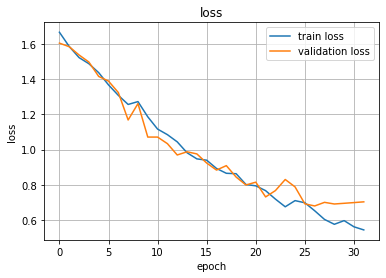

In [28]:
plt.title('loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.plot(hist.history['loss'],label='train loss')
plt.plot(hist.history['val_loss'], label='validation loss')
plt.legend(loc='best')
plt.grid()
plt.show()

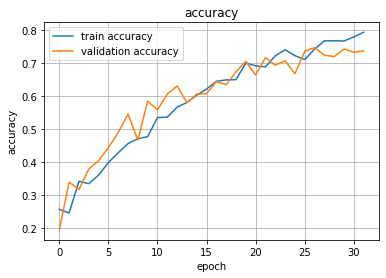

In [29]:
plt.title('accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.plot(hist.history['accuracy'],label='train accuracy')
plt.plot(hist.history['val_accuracy'], label='validation accuracy')
plt.legend(loc='best')
plt.grid()
plt.show()

In [30]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [31]:
y_test = tf.keras.utils.to_categorical(y_test, num_classes=5)

In [32]:
map = ['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']

In [33]:
plt.figure(figsize=(6, 6))
predicted_value = cnn.predict(x_test)
cm = confusion_matrix(np.argmax(y_test, axis=-1), np.argmax(predicted_value, axis=-1))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=map, yticklabels=map)
plt.show()

22/22 [==============================] - 0s 12ms/step


ValueError: ignored

<Figure size 432x432 with 0 Axes>

In [ ]:
from tensorflow.keras.preprocessing import image
img_path = '/content/gdrive/MyDrive/test_flowers/daisy2.jpg'
img = image.load_img(img_path, target_size=(320, 320))
plt.imshow(img)
plt.show()

In [ ]:
img_path = '/content/gdrive/MyDrive/test_flowers/daisy2.jpg'
img = image.load_img(img_path, target_size=(100, 100))
plt.imshow(img)
plt.show()

In [ ]:
img_array = image.img_to_array(img)
img_batch = np.expand_dims(img_array, axis=0)

print(f"Image is {map[np.argmax(cnn.predict(img_batch))]}")

In [ ]:
img_path = '/content/gdrive/MyDrive/test_flowers/sunflower01.jpg'
img = image.load_img(img_path, target_size=(100, 100))
plt.imshow(img)
plt.show()

In [ ]:
img_array = image.img_to_array(img)
img_batch = np.expand_dims(img_array, axis=0)

print(f"Image is {map[np.argmax(cnn.predict(img_batch))]}")


In [ ]:
img_path = '/content/gdrive/MyDrive/test_flowers/rose1.jpg'
img = image.load_img(img_path, target_size=(100, 100))
plt.imshow(img)
plt.show()

In [ ]:
img_array = image.img_to_array(img)
img_batch = np.expand_dims(img_array, axis=0)

print(f"Image is {map[np.argmax(cnn.predict(img_batch))]}")

In [ ]:
img_path = '/content/gdrive/MyDrive/test_flowers/tulip01.jpg'
img = image.load_img(img_path, target_size=(100, 100))
plt.imshow(img)
plt.show()

In [ ]:
img_array = image.img_to_array(img)
img_batch = np.expand_dims(img_array, axis=0)

print(f"Image is {map[np.argmax(cnn.predict(img_batch))]}")